<h1>Naive Modelle</h1>

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('electricistan-national-energy-grid/data_preparation.csv')
data['datetime'] = pd.to_datetime(data['datetime'])
data['datetime_day_saving'] = pd.to_datetime(data['datetime_day_saving'])
data.set_index('datetime', inplace=True, drop=False)
data.tail(3)


,datetime,power,datetime_day_saving,Is_15_Min_Interval,daylight_saving,datetime.1,week_days,month,date,First_Difference
datetime,,,,,,,,,,
2022-09-14 22:15:00,2022-09-14 22:15:00,4533,2022-09-14 23:15:00,True,True,2022-09-14 22:15:00,2,9,2022-09-14,-30.0
2022-09-14 22:30:00,2022-09-14 22:30:00,4512,2022-09-14 23:30:00,True,True,2022-09-14 22:30:00,2,9,2022-09-14,-21.0
2022-09-14 22:45:00,2022-09-14 22:45:00,4487,2022-09-14 23:45:00,True,True,2022-09-14 22:45:00,2,9,2022-09-14,-25.0


<h2>Teile die Daten</h2>
Teile die Daten in ein Trains-Set und ein Test-Set auf. Das Test-Set enthält Daten für das letzte Jahr. Entspricht 365*24*15 Datenpunkte

In [64]:
start_time = pd.to_datetime('2021-09-14 22:45:00')

data_train = data[data['datetime'] < start_time]
display(data_train.tail(3))

data_test = data[data['datetime'] >= start_time]
display(data_test.head(3))


,datetime,power,datetime_day_saving,Is_15_Min_Interval,daylight_saving,datetime.1,week_days,month,date,First_Difference
datetime,,,,,,,,,,
2021-09-14 22:00:00,2021-09-14 22:00:00,4609,2021-09-14 23:00:00,True,True,2021-09-14 22:00:00,1,9,2021-09-14,-72.0
2021-09-14 22:15:00,2021-09-14 22:15:00,4585,2021-09-14 23:15:00,True,True,2021-09-14 22:15:00,1,9,2021-09-14,-24.0
2021-09-14 22:30:00,2021-09-14 22:30:00,4538,2021-09-14 23:30:00,True,True,2021-09-14 22:30:00,1,9,2021-09-14,-47.0


,datetime,power,datetime_day_saving,Is_15_Min_Interval,daylight_saving,datetime.1,week_days,month,date,First_Difference
datetime,,,,,,,,,,
2021-09-14 22:45:00,2021-09-14 22:45:00,4520,2021-09-14 23:45:00,True,True,2021-09-14 22:45:00,1,9,2021-09-14,-18.0
2021-09-14 23:00:00,2021-09-14 23:00:00,4444,2021-09-15 00:00:00,True,True,2021-09-14 23:00:00,1,9,2021-09-14,-76.0
2021-09-14 23:15:00,2021-09-14 23:15:00,4312,2021-09-15 00:15:00,True,True,2021-09-14 23:15:00,1,9,2021-09-14,-132.0


<h2>Ein naive Prognosen</h2>
Es werden drei sehr einfache Prognosen erstellt. 
<ol>
    <li>Setzt den letzten Wert des Jahres als Prognose für das nächste Jahr </li>
    <li>Der Durchschnitt des letzten Jahres ist die Progonse für das nächste Jahr</li>
    <li>Die Werte des letzten Jahres ist die Prognose für das nächste Jahr</li>
</ol>

<IPython.core.display.Javascript object>


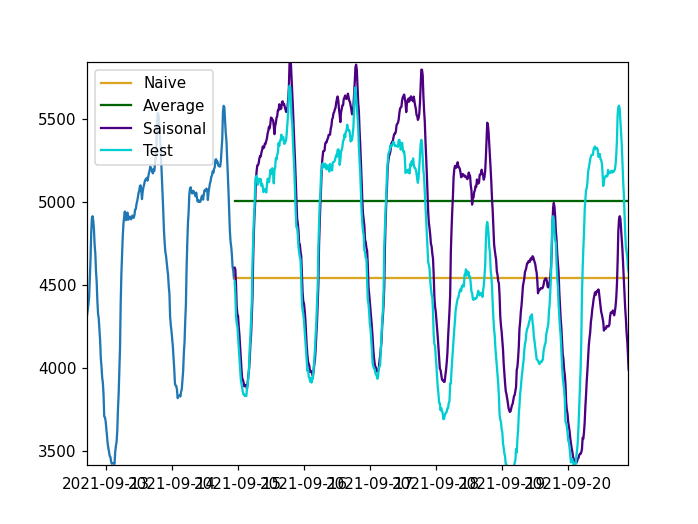

In [63]:
%matplotlib notebook

naive_prediction = pd.Series(data_train['power'].iloc[-1], index=data_test.index)
naive_avg = pd.Series(np.mean(data_train['power'].tail(len(data_test.index))), index=data_test.index)
naive_seasonal = pd.Series(data_train['power'].tail(len(data_test.index)).values, index=data_test.index)

plt.plot(data_train['power'])
plt.plot(naive_prediction,label='Naive', color='goldenrod')
plt.plot(naive_avg,label='Average', color='darkgreen')
plt.plot(naive_seasonal,label='Saisonal', color='indigo')
plt.plot(data_test['power'],label='Test', color='darkturquoise')
plt.legend()
plt.show()